In [1]:
from field_of_view import FieldOfView
from clusters import ClusterParam
import os
import numpy as np

In [2]:
nm_per_pixel = 21.34
time_per_frame = 0.1
Tau_D_7xR3 = 152.32
Tau_D_16xR1 = 97
background_threshold = 500
homer_paths = [os.path.join('Data/Homer/', item) for item in os.listdir('Data/Homer/')]
life_act_paths = [os.path.join('Data/LifeAct/', item) for item in os.listdir('Data/LifeAct/')]
docker_7xR3_paths = [os.path.join('Data/7xR3/', item) for item in os.listdir('Data/7xR3/')]
docker_16xR1_paths = [os.path.join('Data/16xR1/', item) for item in os.listdir('Data/16xR1/')]
Params = [ClusterParam(25, 15, 'GluA1'),
          ClusterParam(25, 25, 'GluA1'),
          ClusterParam(25, 50, 'GluA1'),
          ClusterParam(25, 75, 'GluA1'),
          ClusterParam(25, 15, 'GluA2'),
          ClusterParam(25, 25, 'GluA2'),
          ClusterParam(25, 50, 'GluA2'),
          ClusterParam(25, 75, 'GluA2'),]

FOVs = []

# Estimated Processing Time: 4 min
for i in range(len(homer_paths)):
    homer_path = homer_paths[i]
    life_act_path = life_act_paths[i]
    if i in [0, 4, 5, 6, 9, 12]:
        points = [['GluA1', docker_16xR1_paths[i], 'white', time_per_frame],
                  ['GluA2', docker_7xR3_paths[i], 'cyan', time_per_frame]]
    else:
        points = [['GluA1', docker_7xR3_paths[i], 'white', time_per_frame],
                  ['GluA2', docker_16xR1_paths[i], 'cyan', time_per_frame]]
    FOVs.append(FieldOfView(homer_centers=homer_path, 
                            life_act=life_act_path, 
                            nm_per_pixel=nm_per_pixel,
                            points=points, 
                            Params=Params, 
                            threshold=background_threshold))
FOVs = np.array(FOVs)

Loading Homer Centers...
Loading Life Act...
Loading GluA1...
Loading GluA2...
Finding Clusters for: GluA1(eps=25, min_samples=15)
Found 294 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=25)
Found 159 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=50)
Found 72 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=75)
Found 34 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=15)
Found 784 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=25)
Found 384 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=50)
Found 81 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=75)
Found 22 Clusters
Loading Homer Centers...
Loading Life Act...
Loading GluA1...
Loading GluA2...
Finding Clusters for: GluA1(eps=25, min_samples=15)
Found 717 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=25)
Found 328 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=50)
Found 105 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=75)
Found 52 Clus

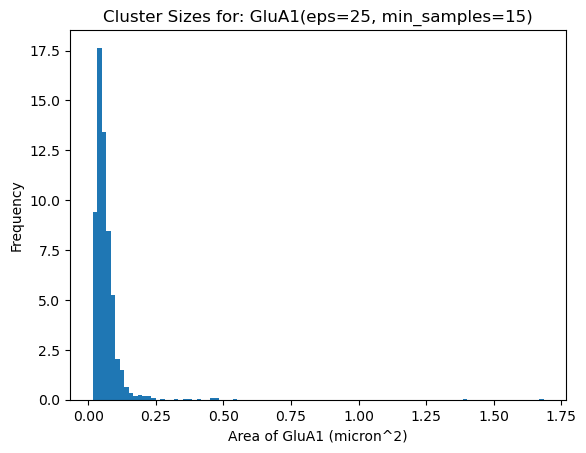

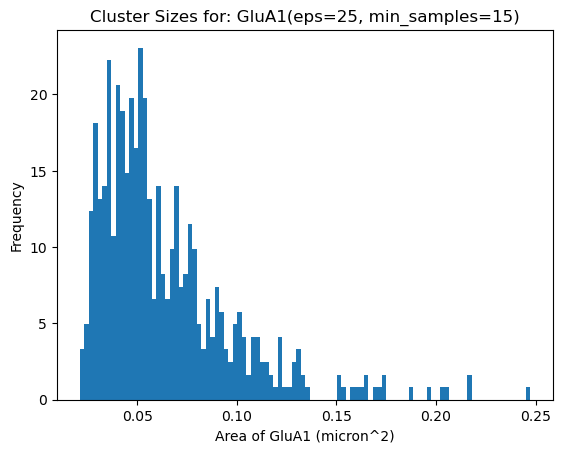

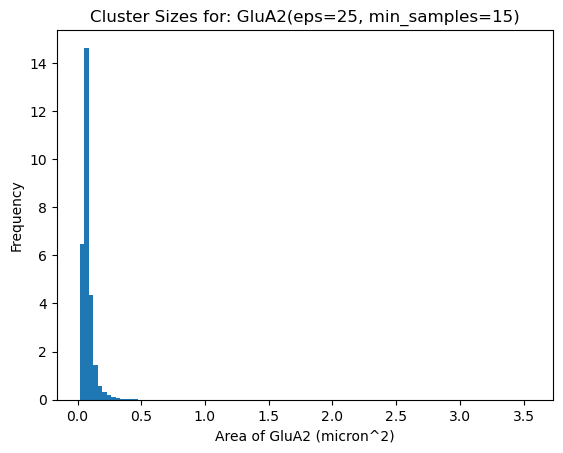

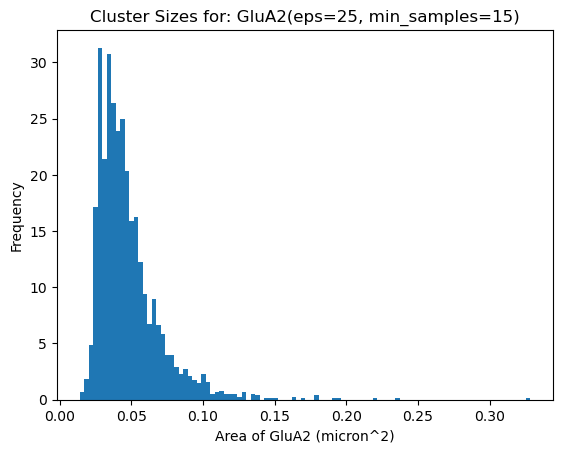

In [10]:
# GluA1 16xR1
FOVs[0].cluster_size_histogram(Tau_D=Tau_D_16xR1, Params=Params[0], bins=100, max_dark_time=500, 
                               area=True, extra_FOVs=FOVs[[4, 5, 6, 9, 12]])

# GluA1 7xR3
FOVs[1].cluster_size_histogram(Tau_D=Tau_D_7xR3, Params=Params[0], bins=100, max_dark_time=500, 
                               area=True, extra_FOVs=FOVs[[2, 3, 7, 8, 10, 11]])

# GluA2 16xR1
FOVs[1].cluster_size_histogram(Tau_D=Tau_D_16xR1, Params=Params[4], bins=100, max_dark_time=500, 
                               area=True, extra_FOVs=FOVs[[2, 3, 7, 8, 10, 11]])

# GluA2 7xR3
FOVs[0].cluster_size_histogram(Tau_D=Tau_D_7xR3, Params=Params[4], bins=100, max_dark_time=500, 
                               area=True, extra_FOVs=FOVs[[4, 5, 6, 9, 12]])

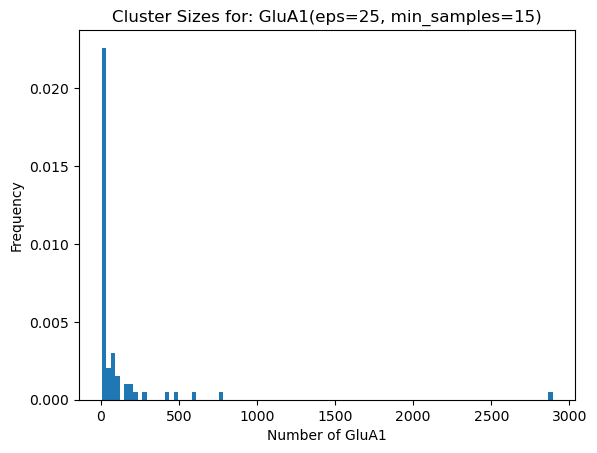

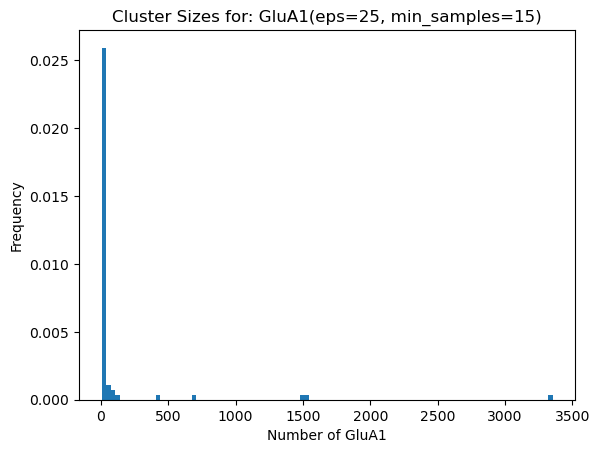

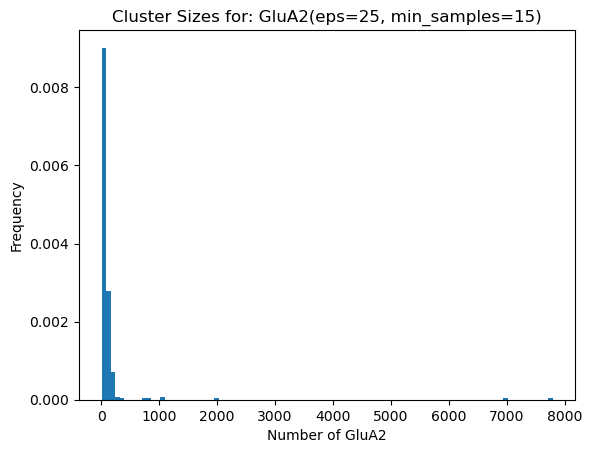

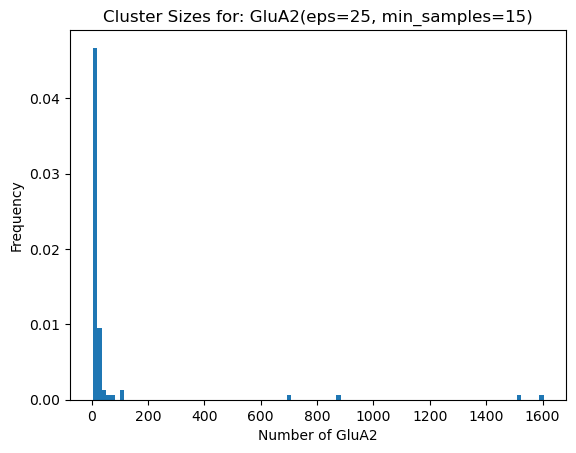

In [9]:
# GluA1 16xR1
FOVs[0].cluster_size_histogram(Tau_D=Tau_D_16xR1, Params=Params[0], bins=100, max_dark_time=100, 
                               area=False, extra_FOVs=FOVs[[4, 5, 6, 9, 12]])

# GluA1 7xR3
FOVs[1].cluster_size_histogram(Tau_D=Tau_D_7xR3, Params=Params[0], bins=100, max_dark_time=100, 
                               area=False, extra_FOVs=FOVs[[2, 3, 7, 8, 10, 11]])

# GluA2 16xR1
FOVs[1].cluster_size_histogram(Tau_D=Tau_D_16xR1, Params=Params[4], bins=100, max_dark_time=100, 
                               area=False, extra_FOVs=FOVs[[2, 3, 7, 8, 10, 11]])

# GluA2 7xR3
FOVs[0].cluster_size_histogram(Tau_D=Tau_D_7xR3, Params=Params[4], bins=100, max_dark_time=100, 
                               area=False, extra_FOVs=FOVs[[4, 5, 6, 9, 12]])

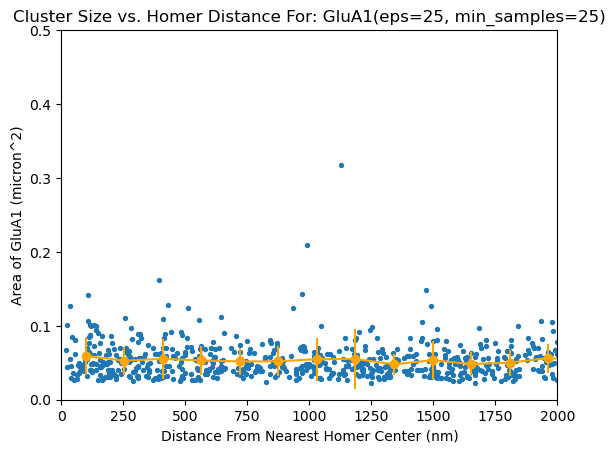

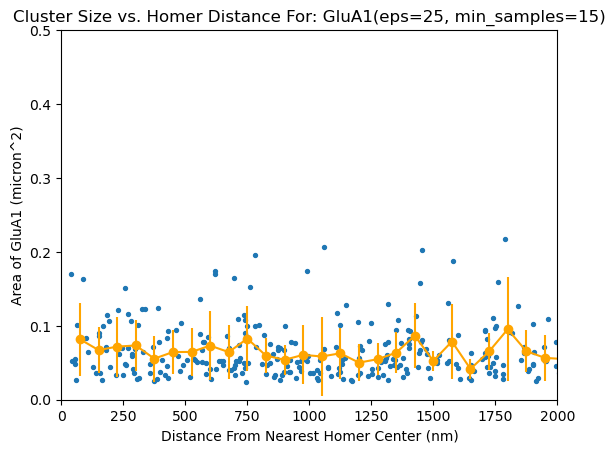

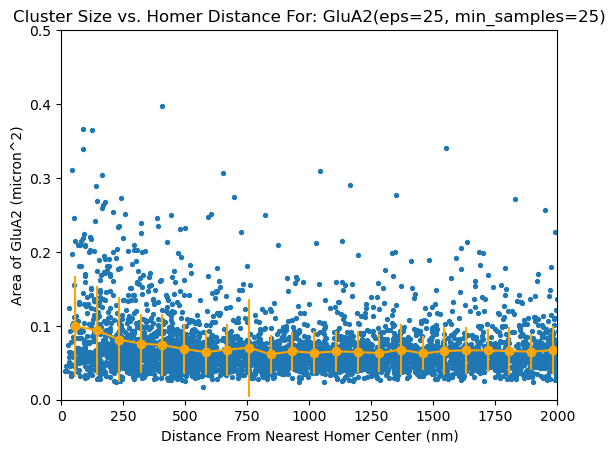

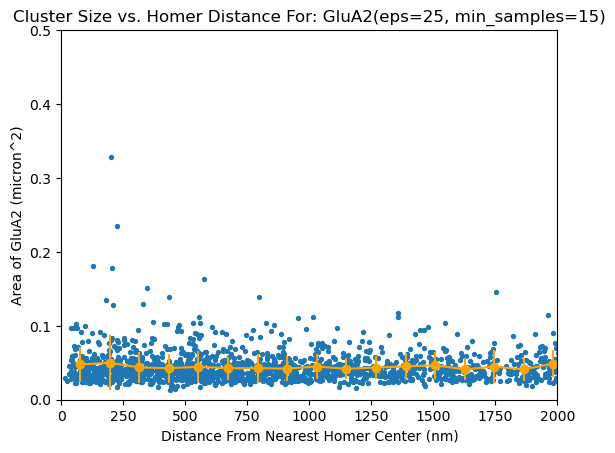

In [31]:
param_idx = 0
area = True
y_top = 0.5
# GluA1 16xR1
FOVs[0].cluster_size_by_distance_to_homer_center(Tau_D=Tau_D_16xR1, Params=Params[1], num_bins=200,
                                                 area=area, y_top=y_top, max_dark_time=500,
                                                 extra_FOVs=FOVs[[4, 5, 6, 9, 12]])

# GluA1 7xR3
FOVs[1].cluster_size_by_distance_to_homer_center(Tau_D=Tau_D_7xR3, Params=Params[0], num_bins=200,  
                                                 area=area, y_top=y_top, max_dark_time=500,
                                                 extra_FOVs=FOVs[[2, 3, 7, 8, 10, 11]])

# GluA2 16xR1
FOVs[1].cluster_size_by_distance_to_homer_center(Tau_D=Tau_D_16xR1, Params=Params[5], num_bins=200,  
                                                 area=area, y_top=y_top, max_dark_time=500,
                                                 extra_FOVs=FOVs[[2, 3, 7, 8, 10, 11]])

# GluA2 7xR3
FOVs[0].cluster_size_by_distance_to_homer_center(Tau_D=Tau_D_7xR3, Params=Params[4], num_bins=200,
                                                 area=area, y_top=y_top, max_dark_time=500,
                                                 extra_FOVs=FOVs[[4, 5, 6, 9, 12]])